In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Fetch the data

In [5]:
housing=pd.read_csv('./datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Get a Quick info of the dataset

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Saving figure Attribute Histogram Plot


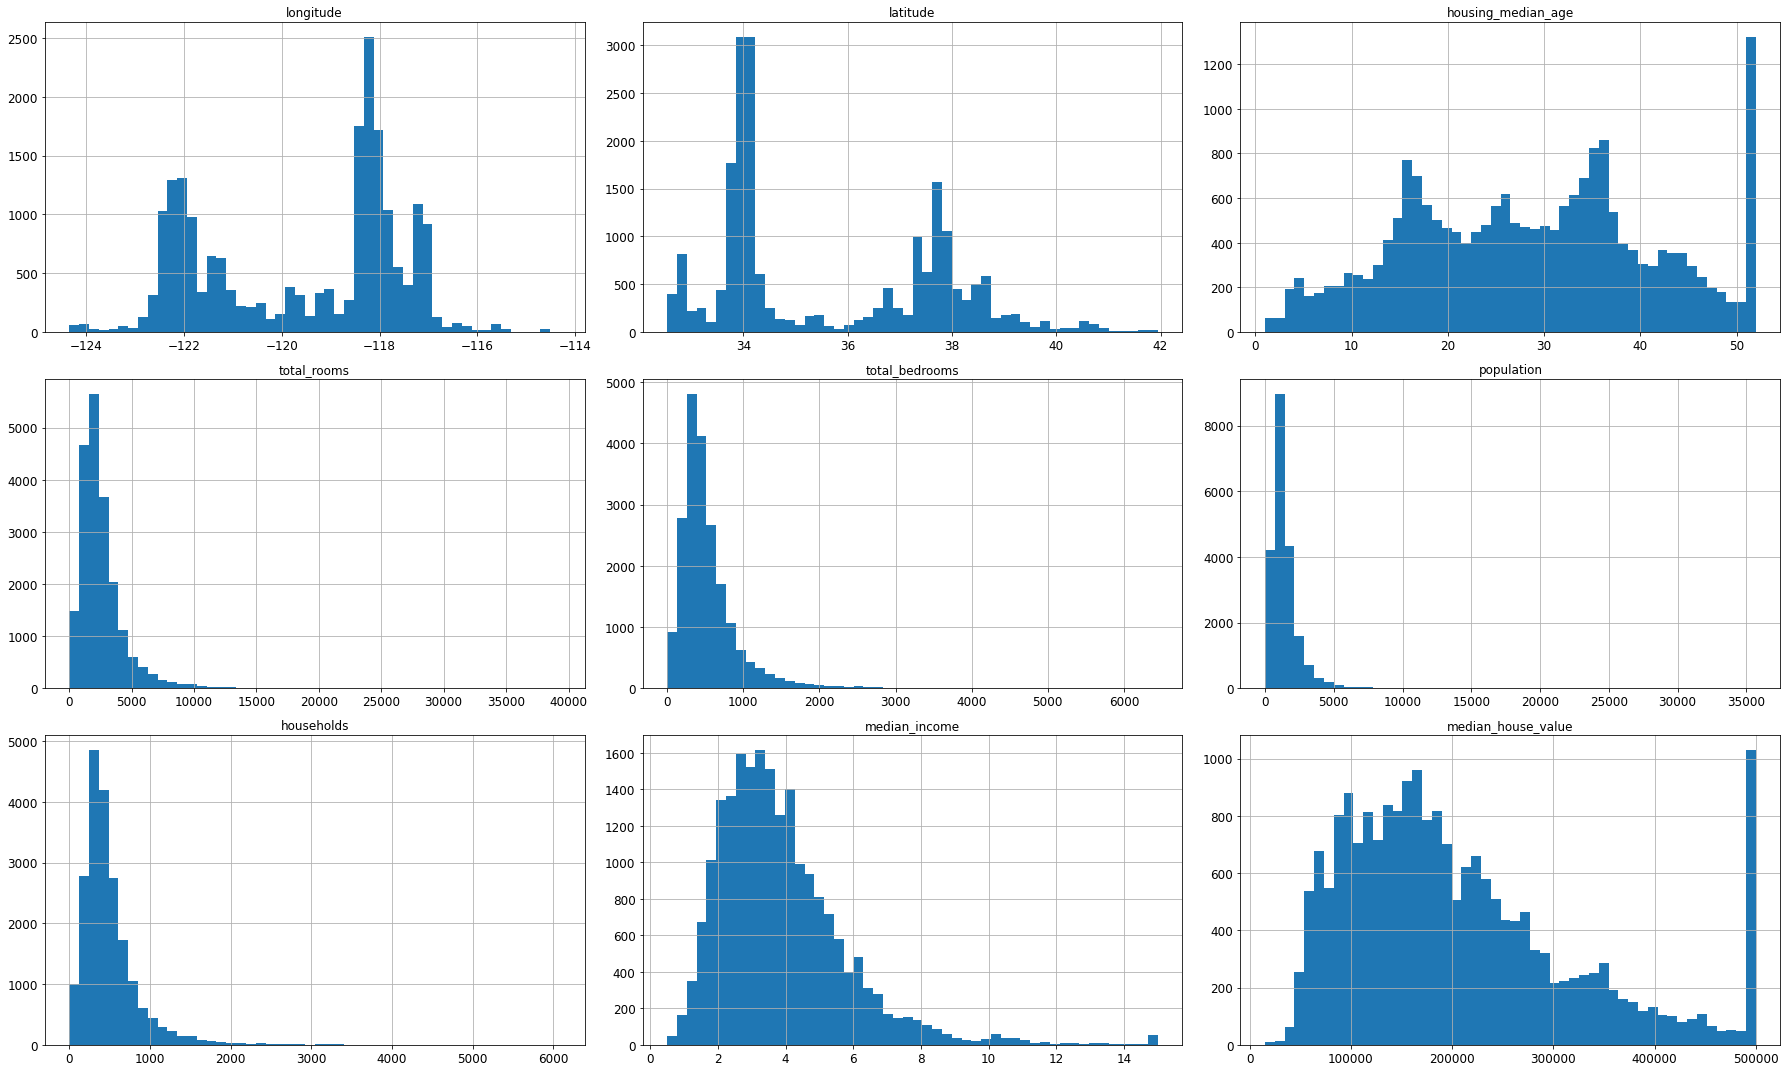

In [10]:
housing.hist(bins=50,figsize=(25,15))
# saving fig 
save_fig('Attribute Histogram Plot')

In [11]:
housing['income_cat']=pd.cut(housing['median_income'],
                            bins=[0,1.5,3,4.5,6,np.inf],
                            labels=[1,2,3,4,5])

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

# Different type of splitting data

1. using crc3

In [13]:
from zlib import crc32

def test_set_check(identifier,test_ratio=0.2):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio *2**32

2. using hashlib

In [14]:
import hashlib
def test_set_check(identifier,test_ratio=0.2,hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1]< 256*test_ratio

In [15]:
def test_set_check(identifier,test_ratio=0.2,hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest()[-1])

- fuction of splitting

In [16]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.iloc[~in_test_set],data.loc[in_test_set]

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2)

<AxesSubplot:>

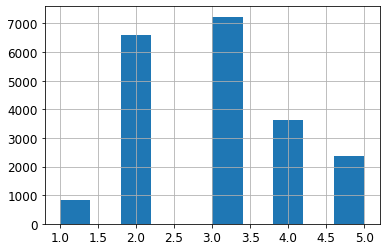

In [18]:
housing['income_cat'].hist()

### performing stratified split based on income category

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit


In [20]:
Split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in Split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [21]:
pd.DataFrame({'stratified':strat_test_set['income_cat'].value_counts()/len(strat_test_set),
 'training':train_set['income_cat'].value_counts()/len(train_set),
 'overall':housing['income_cat'].value_counts()/len(housing)
 })

,stratified,training,overall
3,0.350533,0.348595,0.350581
2,0.318798,0.317466,0.318847
4,0.176357,0.178537,0.176308
5,0.114341,0.115673,0.114438
1,0.039971,0.039729,0.039826


In [22]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop('income_cat',axis=1,inplace=True)

# Visualizing the Data to Gain Insights

In [23]:
house=strat_train_set.copy()

# Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

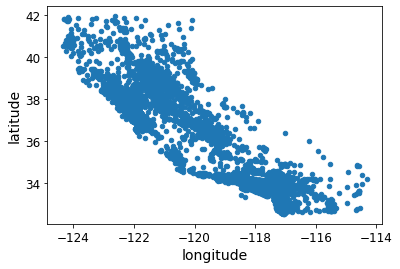

In [24]:
house.plot(kind='scatter',x='longitude',y='latitude')


Saving figure better_vizualisation_plot


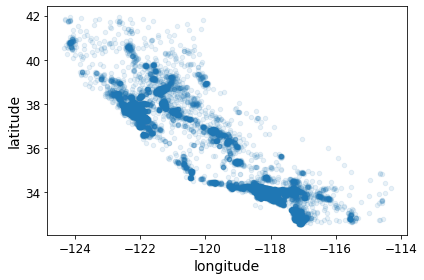

In [25]:
house.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
save_fig('better_vizualisation_plot')

Saving figure Housing_prices_scatterplot


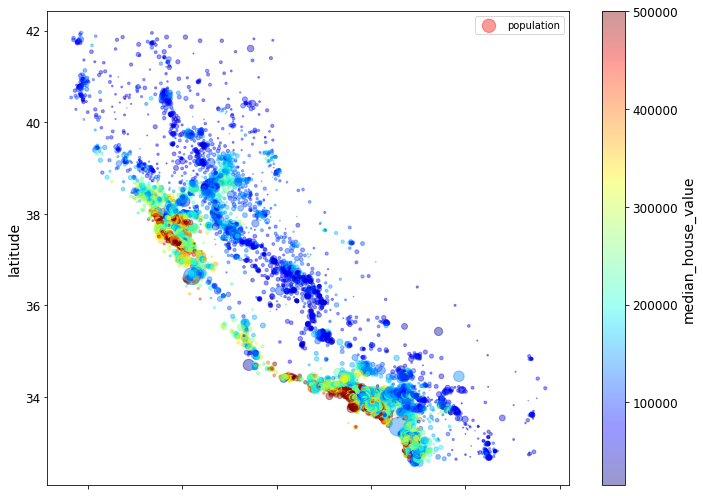

In [26]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()
save_fig("Housing_prices_scatterplot")

In [27]:
# #Download the California image
# import urllib
# images_path=os.path.join(PROJECT_ROOT_DIR,'images')
# os.makedirs(images_path,exist_ok=True)
# DOWNLOAD_ROOT='http://raw.githubusercontent.com/ageon/hanson-ml2/master/'
# filename= 'california.png'
# print('Downloading',filename)
# url=DOWNLOAD_ROOT+'images/end_toend_project/'+filename
# urllib.request.urlretrieve(url,os.path.join(images_path,filename))

Saving figure California_housing_prices_plot


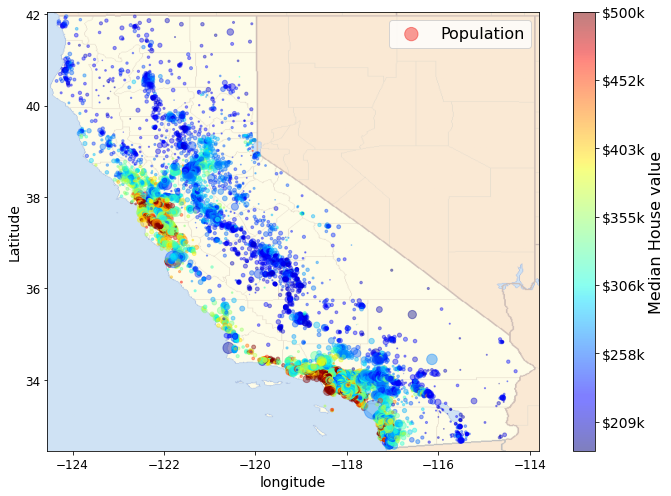

In [28]:
import matplotlib.image as mping
filename='california.png'
california_img = mping.imread(os.path.join(IMAGES_PATH,filename))
ax = housing.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,7),
                  s=housing['population']/100,label="Population",
                  c='median_house_value',cmap=plt.get_cmap('jet'),
                  colorbar=False,alpha=0.4)
plt.imshow(california_img,extent=[-124.55, -113.80, 32.45, 42.05],alpha = 0.5,
          cmap=plt.get_cmap('jet'))
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("longitude",fontsize=14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar(ticks = tick_values/prices.max())
cbar.ax.set_yticklabels(['$%dk'%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label("Median House value",fontsize=16)
plt.legend(fontsize=16)
save_fig("California_housing_prices_plot")

# Looking for Correlation

In [29]:
corr_matrix=house.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

Saving figure Scatter matrix Plot


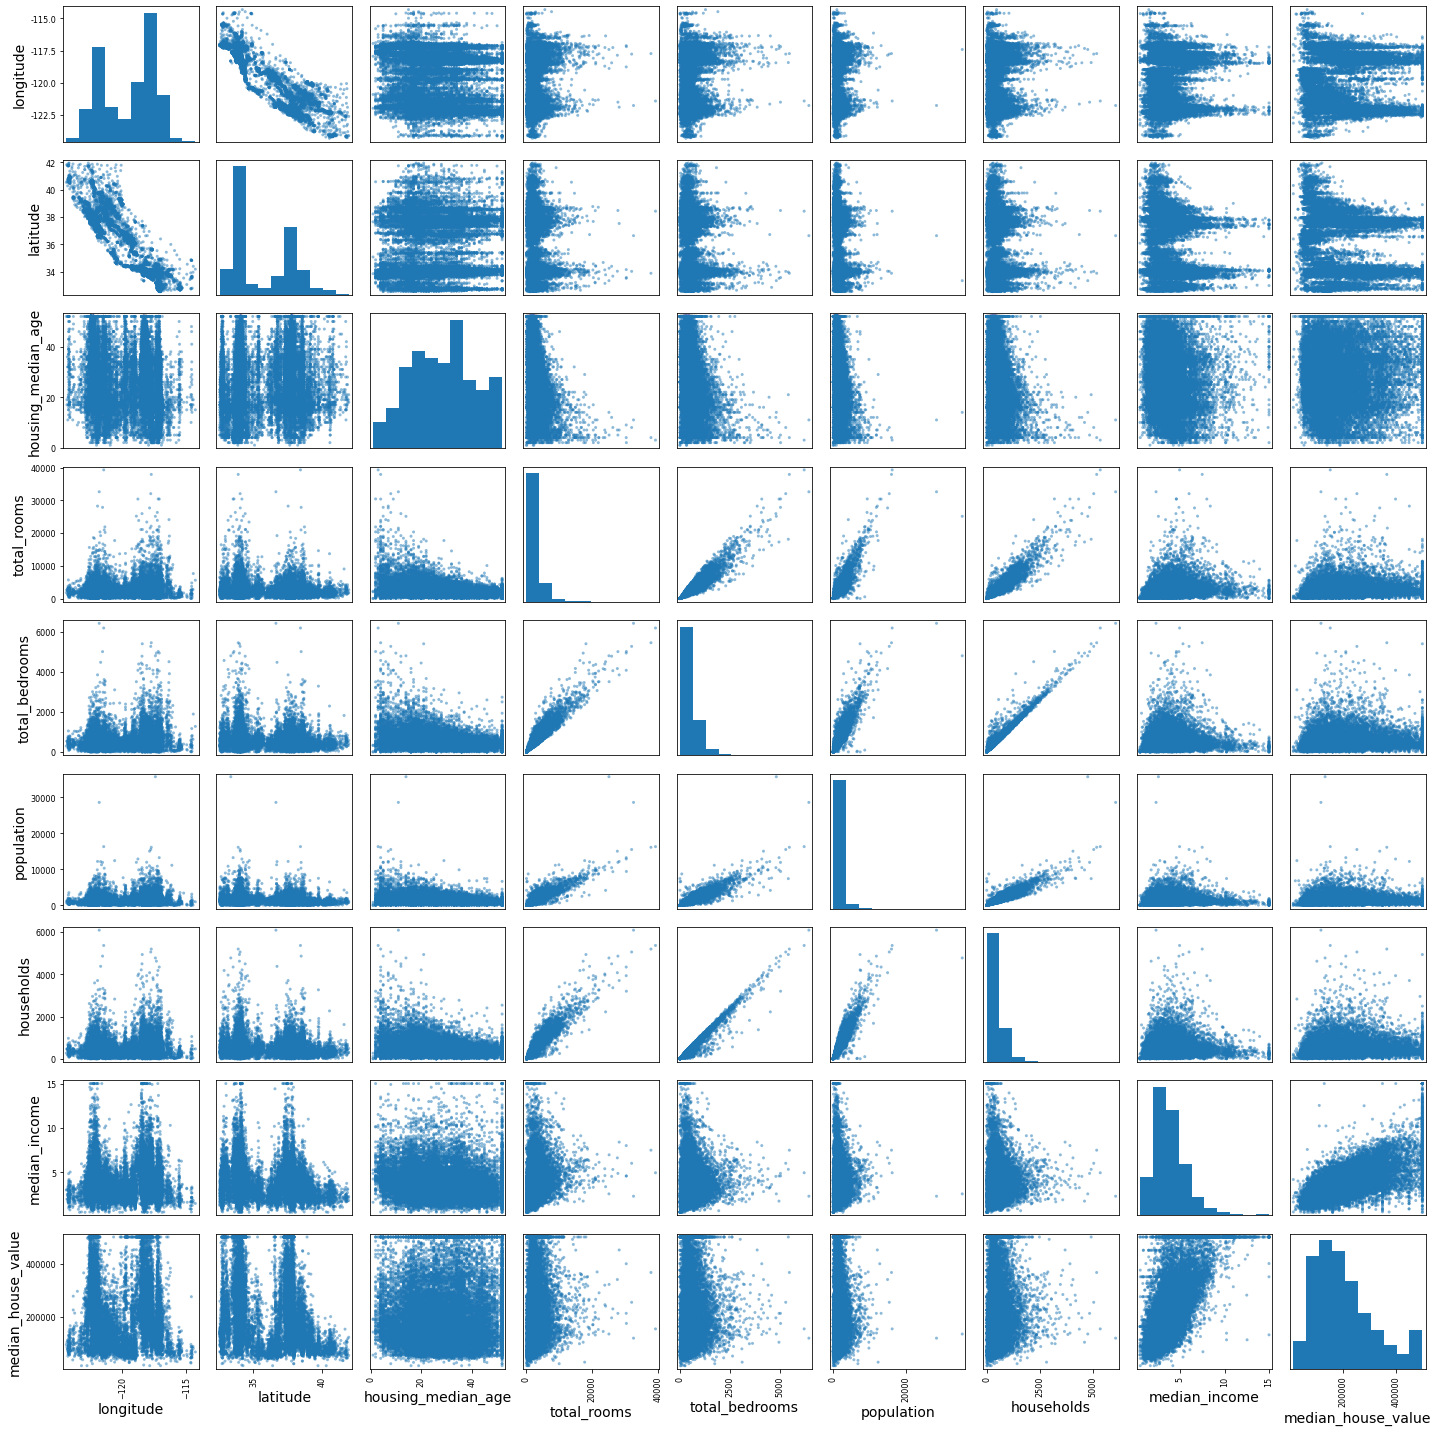

In [32]:
scatter_matrix(housing,figsize=(20,20))
save_fig('Scatter matrix Plot')

Saving figure income vs house value scatterplot


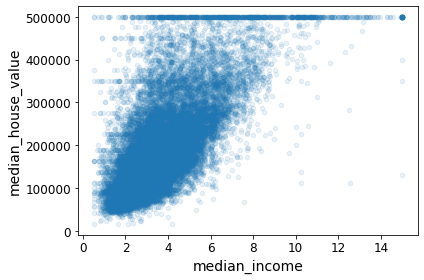

In [33]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
save_fig('income vs house value scatterplot')

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

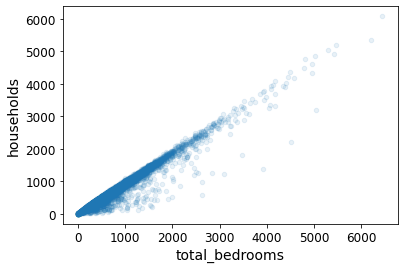

In [34]:
housing.plot(kind='scatter',x='total_bedrooms',y='households',alpha=0.1)


# Experimenting with Attribute Combinations

In [35]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']
housing['bedroom_per_household']=housing['total_bedrooms']/housing['households']
housing['population_per_room']=housing['population']/housing['total_rooms']

In [36]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
population_per_room        -0.033557
longitude                  -0.045967
bedroom_per_household      -0.046739
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

clean copy

In [37]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,bedroom_per_household,population_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655,1.097062,0.619576
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050,0.476104,2.894913
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308,0.333333,0.018109
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741,1.006029,0.435523
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116,1.048889,0.516013
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261,1.099631,0.656865
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333,34.066667,392.631579


# Prepare Data for Machine Learning Algorithms

In [38]:
housing_data=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

# Data cleaning

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [40]:
num_feature = [feature for feature in housing_data.columns if housing_data[feature].dtype!='O']
cat_feature = [feature for feature in housing_data.columns if housing_data[feature].dtype=='O']

In [41]:
imputer.fit(housing_data[num_feature])

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
housing_data[num_feature].median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [44]:
X = imputer.transform(housing_data[num_feature])
housing_tr = pd.DataFrame(X,columns=num_feature,index=housing_data.index)

In [45]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Handling Text And Categorical Attributes  

- Now let Process the categorical input feature,Ocean_proximity

In [46]:
housing_data[cat_feature].head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [47]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_data[cat_feature])


In [48]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
cat_encoder.fit_transform(housing[cat_feature].copy())

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [51]:
cat_encoder.fit_transform(housing[cat_feature].copy()).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Custom Transformers  

Let's create a custom transformer to add extra attributes:

In [174]:
from sklearn.base import BaseEstimator,TransformerMixin
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedroom_per_room]
#         print('rooms/household :\n',rooms_per_household.shape,X.shape)
        return np.c_[X,rooms_per_household,population_per_household]

In [53]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.select_dtypes(include=[np.number]).values)

In [54]:
housing_extra_attribs.shape,housing_data.shape

((16512, 10), (16512, 9))

In [55]:
housing_extra_attribs=pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_data.select_dtypes(include=[np.number]).columns)+['rooms-per_household','population_per_household']
    )
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms-per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,2.411178


# transformation pipeline

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [132]:
num_pipeline.fit_transform(housing_data.drop('ocean_proximity',axis=1))

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [176]:
from sklearn.compose import ColumnTransformer

num_attribs = num_feature
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [184]:
housing_prepared=full_pipeline.fit_transform(housing_data)

In [185]:
housing_prepared.shape

(16512, 16)

to select the subset of the pandas Dataframe columns (dataframselector)and Feature union

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [62]:
num_attribs =num_feature
cat_attribs = cat_feature

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [63]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [64]:
old_housing_prepared=old_full_pipeline.fit_transform(housing_data)

In [65]:
np.allclose(housing_prepared,old_housing_prepared)

True

# Select and Train a Model

## Training and evaluating on the Training Set

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [67]:
predicted_labels=lin_reg.predict(housing_prepared)
print("prediction",predicted_labels[:5])

prediction [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [68]:
print('labels :\n',housing_labels.iloc[:5])

labels :
 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


In [69]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(housing_labels,predicted_labels))

68627.87390018743

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Better Evaluaion using Cross-Validation

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
tree_rmse_score= np.sqrt(-scores)

In [73]:
def display_scores(scores):
    print('scores :',scores)
    print('mean',scores.mean())
    print('standard deviation : ',scores.std())

display_scores(tree_rmse_score)

scores : [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
mean 71629.89009727491
standard deviation :  2914.035468468928


In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores : [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean 69104.07998247063
standard deviation :  2880.3282098180657


In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [76]:
forest_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_mse

0.0

In [77]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores : [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
mean 50435.58092066179
standard deviation :  2203.3381412764606


In [78]:
from sklearn.svm import SVR
svm_reg= SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing_labels)
SVC_prediction=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels,SVC_prediction)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

111095.06635291968

# Fine Tune Your model

## Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,0,30],'max_features':[2,4,6,8]},
    
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than z

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 0, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [82]:
cvres=grid_search.cv_results_
for mean_score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),param)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 0}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 0}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 0}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 0}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57831.136061214274 {'bootstrap': False, 'max_features': 4

In [83]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127344,6.940293e-03,0.006802,0.000753,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,14,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.003002,2.114277e-06,0.000000,0.000000,2,0,NaN,"{'max_features': 2, 'n_estimators': 0}",NaN,NaN,...,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.216369,2.417869e-02,0.054322,0.002319,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,6,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.201752,5.522977e-03,0.006894,0.000692,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,12,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.002599,4.932464e-04,0.000000,0.000000,4,0,NaN,"{'max_features': 4, 'n_estimators': 0}",NaN,NaN,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.974947,5.883718e-03,0.053788,0.002740,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.265538,2.979353e-03,0.006802,0.000751,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,9,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.002800,4.000664e-04,0.000000,0.000000,6,0,NaN,"{'max_features': 6, 'n_estimators': 0}",NaN,NaN,...,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.645810,7.639237e-02,0.052605,0.003137,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.330070,9.029531e-03,0.006400,0.000492,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,10,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


# randomized Search

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}
forest_reg = RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                             n_iter=10,cv=5,
                             scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184D6863580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184D678FE80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
cvres=rnd_search.cv_results_
for mean_scores,params in zip(cvres["mean_test_score"],cvres['params']):
    print(np.sqrt(-mean_score),params)

51278.37877140253 {'max_features': 7, 'n_estimators': 180}
51278.37877140253 {'max_features': 5, 'n_estimators': 15}
51278.37877140253 {'max_features': 3, 'n_estimators': 72}
51278.37877140253 {'max_features': 5, 'n_estimators': 21}
51278.37877140253 {'max_features': 7, 'n_estimators': 122}
51278.37877140253 {'max_features': 3, 'n_estimators': 75}
51278.37877140253 {'max_features': 3, 'n_estimators': 88}
51278.37877140253 {'max_features': 5, 'n_estimators': 100}
51278.37877140253 {'max_features': 3, 'n_estimators': 150}
51278.37877140253 {'max_features': 5, 'n_estimators': 2}


# Analyze the Best Models And their errors

In [88]:
features_importance=grid_search.best_estimator_.feature_importances_
features_importance

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [106]:
extra_attributes=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_pipeline=full_pipeline.named_transformers_ ['cat']
cat_encoder = cat_pipeline['catp']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_feature+extra_attributes+cat_one_hot_attribs
sorted(zip(features_importance,attributes),reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

# Evaluate Your System on the Test Set

In [187]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [188]:
final_rmse

47873.26095812988

we can compute 95% confidence interval for the test RMSE:

In [190]:
from scipy import stats

confidence= 0.95
squared_errors =(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc =squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

## A full pipeline with both preparation and prediction

In [193]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("Randomforest", grid_search.best_estimator_)
    ])

full_pipeline_with_predictor.fit(housing_data, housing_labels)
full_pipeline_with_predictor.predict(X_test)

array([488167.46666667, 229946.66666667, 209950.        , ...,
       390406.86666667, 246210.03333333, 223533.33333333])

# Model persistence using joblib

In [194]:
my_model = full_pipeline_with_predictor

In [195]:
import joblib

In [196]:
joblib.dump(my_model,"my_model.pkl")

['my_model.pkl']

In [198]:
# to import

my_model_loaded=joblib.load('my_model.pkl')

In [199]:
my_model_loaded

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    